In [2]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


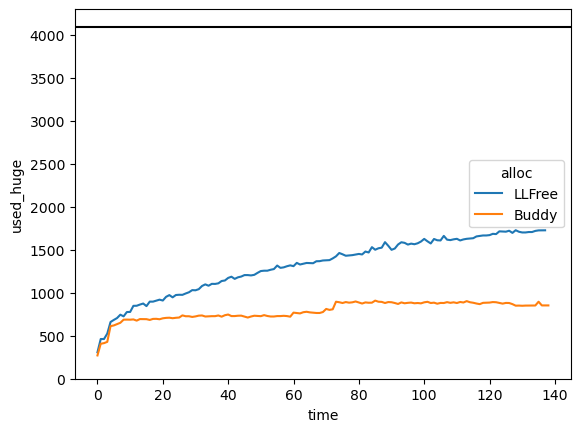

In [31]:
# LLFree, 8G, 8C
max_huge = 8*1024**3 / (2*1024**2)
ll = Path("compiling/240222-160151-ll/mem_0.csv")
ll = pd.read_csv(ll, header=None, names=["small", "huge"])
ll["used_huge"] = max_huge - ll["huge"]
ll["alloc"] = "LLFree"
ll["time"] = ll.index

bu = Path("compiling/240222-151932-bu/mem_0.csv")
bu = pd.read_csv(bu, header=None, names=["small", "huge"])
bu["used_huge"] = max_huge - bu["huge"]
bu["alloc"] = "Buddy"
bu["time"] = bu.index
data = pd.concat([ll, bu])

p = sns.lineplot(data=data, x="time", y="used_huge", hue="alloc")
p.set_ylim(0, max_huge * 1.05)
p.axhline(y=max_huge, xmin=0, xmax=len(data), color="black")


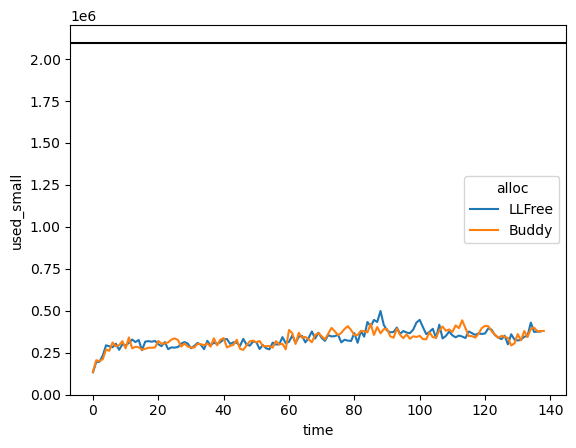

In [32]:
# LLFree, 8G, 8C
max_small = 8*1024**3 / (4*1024)
ll = Path("compiling/240222-160151-ll/mem_0.csv")
ll = pd.read_csv(ll, header=None, names=["small", "huge"])
ll["used_small"] = max_small - ll["small"]
ll["alloc"] = "LLFree"
ll["time"] = ll.index

bu = Path("compiling/240222-151932-bu/mem_0.csv")
bu = pd.read_csv(bu, header=None, names=["small", "huge"])
bu["used_small"] = max_small - bu["small"]
bu["alloc"] = "Buddy"
bu["time"] = bu.index
data = pd.concat([ll, bu])

p = sns.lineplot(data=data, x="time", y="used_small", hue="alloc")
p.set_ylim(0, max_small * 1.05)
p.axhline(y=max_small, xmin=0, xmax=len(data), color="black")


In [48]:
def parse_frag(file: Path) -> pd.DataFrame:
    raw = file.read_text()
    data = ""
    for line in raw.splitlines():
        data += line + ((len(line) + 31) // 32 * 32 - len(line)) * "0"
    huge_pages = len(data)
    out = np.zeros(huge_pages)
    for i, char in enumerate(data):
        level = int(char)
        assert(0 <= level <= 9)
        out[i] = float(level)
    out = out.reshape(((huge_pages + 31) // 32, 32))
    return pd.DataFrame(out)


In [53]:

from typing import Tuple
from matplotlib import colors

sns.set_style("whitegrid")
sns.set_context("poster", font_scale=0.75)
sns.set_palette("colorblind")

def cscale(rgba: Tuple[float, float, float, float], m: float) -> Tuple[float, float, float, float]:
    return (rgba[0] * m, rgba[1] * m, rgba[2] * m, rgba[3])


def cmap_extreme(map: colors.Colormap, min=0, max=1) -> colors.Colormap:
    class Wrap(colors.Colormap):
        def __init__(self, cmap: colors.Colormap):
            self.cmap = cmap
        def __getattr__(self, name):
            if name == "cmap": return self.cmap
            return getattr(self.cmap, name)
        def __eq__(self, other):
            self.cmap.__eq__(other)
        def __copy__(self):
            Wrap(self.cmap.__copy__())
        def __call__(self, X, alpha=None, bytes=False):
            if isinstance(X, np.ndarray):
                X = X - (X <= min) + (X >= max)
            if isinstance(X, float) or isinstance(X, int):
                if X <= min:
                    return self.cmap(X - 1.0, alpha, bytes)
                if X >= max:
                    return self.cmap(X + 1.0, alpha, bytes)
            return self.cmap(X, alpha, bytes)

    return Wrap(map.with_extremes(
        under=cscale(map(-1.0), 0.5), over=cscale(map(2.0), 0.5)))

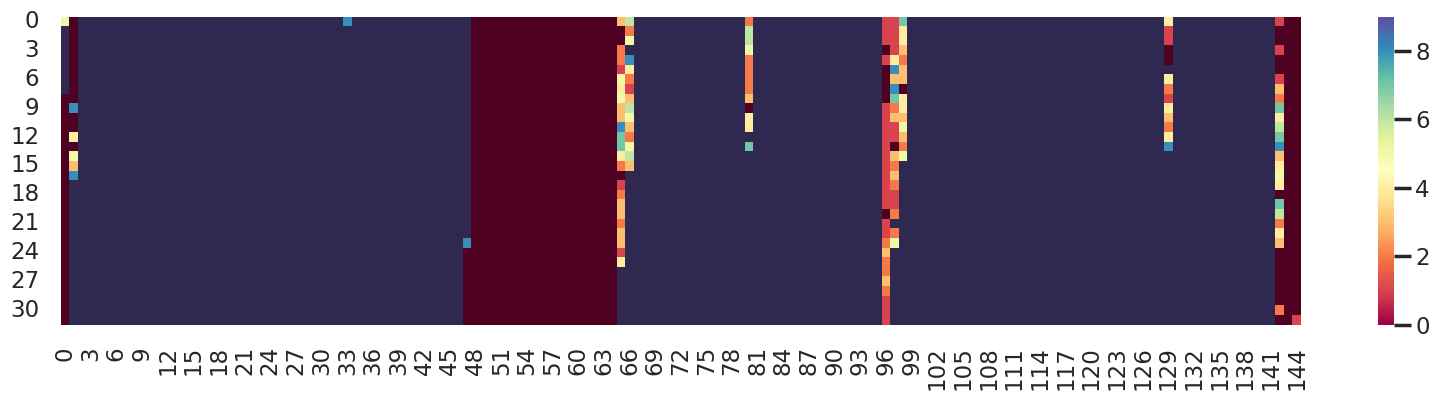

In [58]:
fix, ax = plt.subplots()
fix.set_figwidth(20)
fix.set_figheight(4)
fix.set_facecolor("white")

data = parse_frag(Path("compiling/240223-162226-ll/frag_0_s.txt"))
cmap = cmap_extreme(sns.color_palette("Spectral", as_cmap=True, n_colors=10))

p = sns.heatmap(data.T, ax=ax, cmap=cmap)

In [ ]:
fix, ax = plt.subplots()
fix.set_figwidth(20)
fix.set_figheight(4)
fix.set_facecolor("white")

data = parse_frag(Path("compiling/240223-162226-ll/frag_1_s.txt"))
cmap = cmap_extreme(sns.color_palette("Spectral", as_cmap=True, n_colors=10))

p = sns.heatmap(data.T, ax=ax, cmap=cmap)